# 木構造を python で記述する

やり方はいくつかあると思うけど，
- 自分ですべて実装する: メリットとして構造の理解は進むけど，描画したりするのは結構めんどうかも
- なんらかのパッケージ: メリットとして，描画とかで悩まないで住むけど，木構造に特化したというものもそれほどない
ということで，悩んだけど，描画系とかのメリットをとって，ここでは ``networkx`` をつかうこととする．


- Networkx に関しては，ここらへんで
  本家 https://networkx.org/
- graphviz を入れないと画像に変換できない
  https://graphviz.org/ 
- さいごに graphviz の `python` インターフェースである `pygraphviz` も．
  mac で homebrew 使っている場合は
  ```bash
   pip install --config-settings="--global-option=build_ext" \
               --config-settings="--global-option=-I$(brew --prefix graphviz)/include/" \
               --config-settings="--global-option=-L$(brew --prefix graphviz)/lib/" \
               pygraphviz
   ```
   にしないとヘッダとライブラリを見つけられないかも

どうせ，あとでグラフ構造の記述で使うことになるし

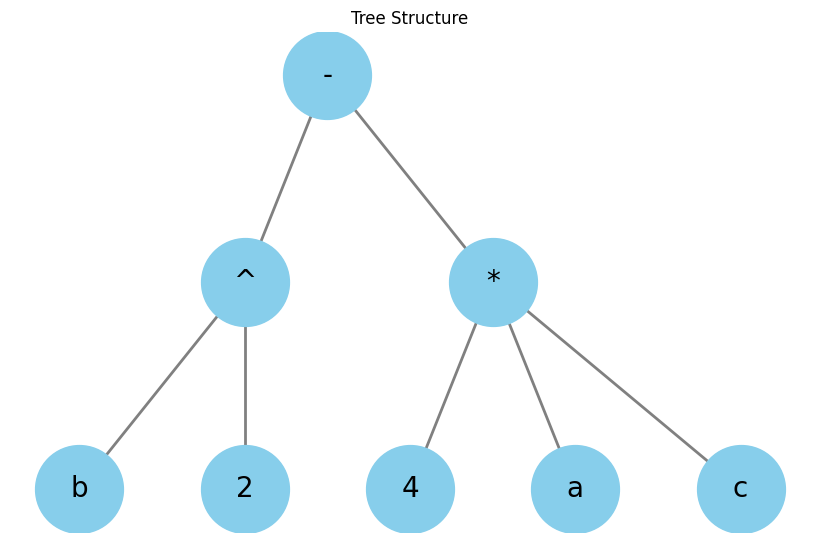

In [3]:
import networkx as nx
import matplotlib.pylab as plt

# b^2 - 4 * a * c という式木を作る
G = nx.Graph()
G.add_nodes_from(['-', '^', '*', 'b', '2', '4', 'a', 'c'])

G.add_edges_from([['-', '^'], ['-', '*']])
G.add_edges_from([['^', 'b'], ['^', '2']])
G.add_edges_from([['*', '4'], ['*', 'a'], ['*', 'c']])

# nx.draw_networkx(G) #これだと木にならないなぁ．．．

pos = nx.drawing.nx_agraph.graphviz_layout(G, prog='dot')
plt.figure(figsize=(8, 5))
nx.draw(G, pos, with_labels=True, node_size=4000, 
        node_color="skyblue", font_size=20, width=2, edge_color="gray")
plt.title("Tree Structure")
plt.show()



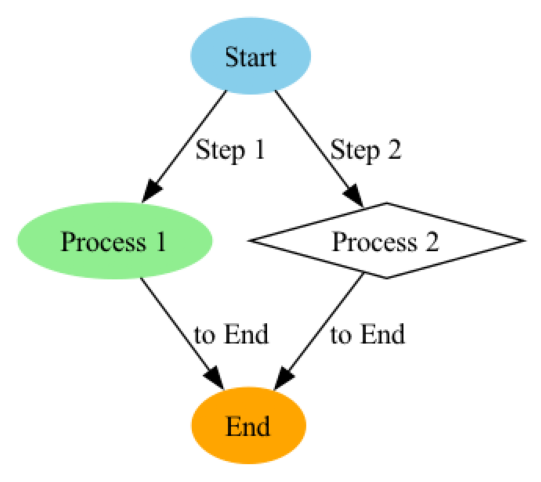

グラフを 'graph.png' として保存しました。


In [2]:
import networkx as nx
from networkx.drawing.nx_pydot import to_pydot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 1. NetworkXでグラフを作成
G = nx.DiGraph() # 有向グラフを作成

# ノードとエッジを追加
G.add_node("A", label="Start", color="skyblue", style="filled")
G.add_node("B", label="Process 1", color="lightgreen", style="filled")
G.add_node("C", label="Process 2", shape="diamond") # ノードの形を変更
G.add_node("D", label="End", color="orange", style="filled")

G.add_edge("A", "B", label="Step 1")
G.add_edge("A", "C", label="Step 2")
G.add_edge("B", "D", label="to End")
G.add_edge("C", "D", label="to End")

# 2. NetworkXグラフをpydotグラフに変換
pdot = to_pydot(G)

# 3. pydotグラフを画像ファイルとして保存
# format='png' や 'svg' など、Graphvizがサポートする形式を指定可能
pdot.write_png('graph.png')

# 4. (任意) 保存した画像をMatplotlibで表示
img = mpimg.imread('graph.png')
plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.axis('off') # 軸を非表示
plt.show()

print("グラフを 'graph.png' として保存しました。")

## 2分木の格納
binary search tree に格納するのを作ってみる．
Gemini 謹製コード．

グラフを描画します...


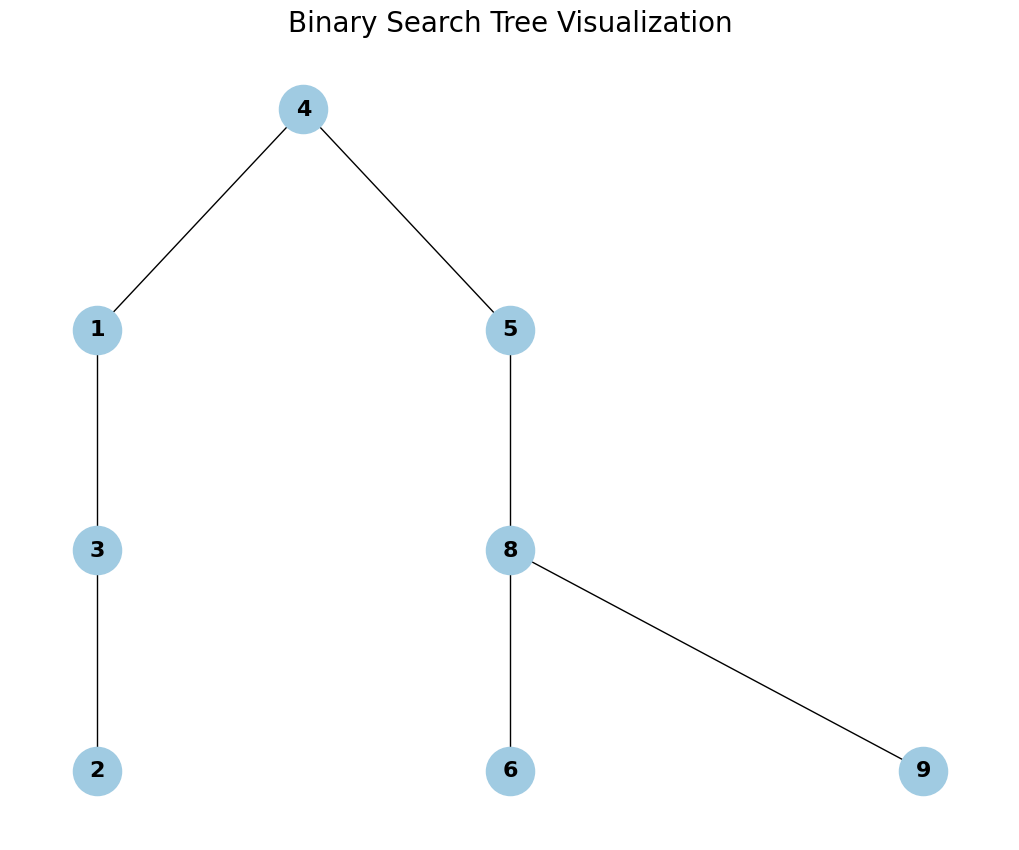

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

def create_and_draw_bst(data_sequence):
    """
    与えられたデータ列から2分探索木を構築し、最終的な木を描画する。

    Args:
        data_sequence (list): 木に格納する数値の列。
    """
    if not data_sequence:
        print("データが空です。")
        return

    # 有向グラフ（Directed Graph）のインスタンスを作成
    G = nx.DiGraph()
    
    # 最初の要素を根（root）としてグラフに追加
    root_value = data_sequence[0]
    G.add_node(root_value)
    
    # 2番目以降の要素を木に追加していく
    for value in data_sequence[1:]:
        current_node = root_value
        while True:
            # 追加する値が現在のノードより小さい場合、左へ
            if value < current_node:
                # 左の子を探す
                # networkxには左右の概念がないため、ノードの値の大小で判断します
                successors = G.successors(current_node)
                left_child = next((child for child in successors if child < current_node), None)
                
                if left_child:
                    # 左の子が存在すれば、そちらへ移動して探索を続ける
                    current_node = left_child
                else:
                    # 左の子が存在しなければ、ここが挿入場所
                    G.add_node(value)
                    G.add_edge(current_node, value)
                    break # ループを抜ける
            
            # 追加する値が現在のノードより大きい場合、右へ
            elif value > current_node:
                # 右の子を探す
                successors = G.successors(current_node)
                right_child = next((child for child in successors if child > current_node), None)

                if right_child:
                    # 右の子が存在すれば、そちらへ移動して探索を続ける
                    current_node = right_child
                else:
                    # 右の子が存在しなければ、ここが挿入場所
                    G.add_node(value)
                    G.add_edge(current_node, value)
                    break # ループを抜ける
            
            # 同じ値の場合は何もしない
            else:
                break

    # --- グラフの描画 ---
    print("グラフを描画します...")
    try:
        # pygraphvizを使って階層的なレイアウト（木構造）を自動計算
        # prog='dot'が階層構造を描画するためのエンジンです
        pos = nx.nx_agraph.graphviz_layout(G, prog='dot')
    except ImportError:
        print("エラー: pygraphvizが見つかりません。'pip install pygraphviz' を実行してください。")
        print("代替として階層的ではないレイアウトで描画します。")
        pos = nx.spring_layout(G) # 代替レイアウト
    
    plt.figure(figsize=(10, 8))
    nx.draw(
        G, 
        pos, 
        with_labels=True, 
        arrows=False, 
        node_size=1200, 
        node_color='#a0cbe2', 
        font_size=16, 
        font_weight='bold'
    )
    plt.title("Binary Search Tree Visualization", size=20)
    plt.show()

# --- メイン処理 ---
if __name__ == '__main__':
    # 2分探索木に挿入するデータ列
    data = [4, 1, 3, 2, 5, 8, 6, 9]
    create_and_draw_bst(data)

アニメーションにするには imageio もいるらしい

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import imageio
import os
import shutil

# --- 設定 ---
# 生成されるGIFファイルの名前
OUTPUT_GIF_PATH = "bst_animation.gif"
# 各フレームの画像を一時的に保存するディレクトリ名
FRAME_DIR = "temp_frames_for_gif"
# アニメーションの速度（1秒あたりのフレーム数）
FPS = 1.5

def create_bst_animation(data_sequence):
    """
    与えられたデータ列から2分探索木を構築し、
    その過程をGIFアニメーションとして保存する。
    """
    if not data_sequence:
        print("データが空です。")
        return

    # 1. フレーム画像を保存するための一時ディレクトリを作成
    if os.path.exists(FRAME_DIR):
        shutil.rmtree(FRAME_DIR) # 既存の場合は一度削除
    os.makedirs(FRAME_DIR)

    frame_files = []

    try:
        # 有向グラフのインスタンスを作成
        G = nx.DiGraph()
        
        # --- ループ処理で各ステップの画像を生成 ---
        for i, value in enumerate(data_sequence):
            # --- 2分探索木のロジック（前回と同じ） ---
            if i == 0:
                G.add_node(value)
                root_value = value
            else:
                current_node = root_value
                while True:
                    if value < current_node:
                        successors = G.successors(current_node)
                        left_child = next((c for c in successors if c < current_node), None)
                        if left_child:
                            current_node = left_child
                        else:
                            G.add_node(value)
                            G.add_edge(current_node, value)
                            break
                    elif value > current_node:
                        successors = G.successors(current_node)
                        right_child = next((c for c in successors if c > current_node), None)
                        if right_child:
                            current_node = right_child
                        else:
                            G.add_node(value)
                            G.add_edge(current_node, value)
                            break
                    else:
                        break # 重複は無視
            
            # --- 現在のグラフ状態を描画して画像として保存 ---
            plt.figure(figsize=(10, 8))
            
            # pygraphvizでレイアウトを計算
            try:
                pos = nx.nx_agraph.graphviz_layout(G, prog='dot')
            except ImportError:
                print("pygraphvizが見つかりません。'pip install pygraphviz'が必要です。")
                return

            # 強調表示する新しいノード
            node_colors = ['#ff6347' if node == value else '#a0cbe2' for node in G.nodes()]

            nx.draw(
                G, 
                pos, 
                with_labels=True, 
                arrows=False, 
                node_size=1200, 
                node_color=node_colors, 
                font_size=16, 
                font_weight='bold'
            )
            plt.title(f"Step {i+1}: Add {value}", size=20)
            
            # ファイルに保存
            filepath = os.path.join(FRAME_DIR, f"frame_{i:03d}.png")
            plt.savefig(filepath)
            plt.close() # メモリを解放するために図を閉じる
            frame_files.append(filepath)
            print(f"フレーム {i+1}/{len(data_sequence)} を生成しました: {filepath}")

        # 2. 保存したフレーム画像からGIFを生成
        print("\nGIFを生成しています...")
        with imageio.get_writer(OUTPUT_GIF_PATH, mode='I', fps=FPS) as writer:
            for filename in frame_files:
                image = imageio.imread(filename)
                writer.append_data(image)
        
        print(f"🎉 アニメーションが完成しました: {OUTPUT_GIF_PATH}")

    finally:
        # 3. 後片付けとして一時ディレクトリと画像を削除
        if os.path.exists(FRAME_DIR):
            shutil.rmtree(FRAME_DIR)
            print(f"一時ディレクトリ {FRAME_DIR} を削除しました。")


# --- メイン処理 ---
if __name__ == '__main__':
    data = [4, 1, 3, 2, 5, 8, 6, 9]
    create_bst_animation(data)

フレーム 1/8 を生成しました: temp_frames_for_gif/frame_000.png
フレーム 2/8 を生成しました: temp_frames_for_gif/frame_001.png
フレーム 3/8 を生成しました: temp_frames_for_gif/frame_002.png
フレーム 4/8 を生成しました: temp_frames_for_gif/frame_003.png
フレーム 5/8 を生成しました: temp_frames_for_gif/frame_004.png
フレーム 6/8 を生成しました: temp_frames_for_gif/frame_005.png
フレーム 7/8 を生成しました: temp_frames_for_gif/frame_006.png
フレーム 8/8 を生成しました: temp_frames_for_gif/frame_007.png

GIFを生成しています...
🎉 アニメーションが完成しました: bst_animation.gif
一時ディレクトリ temp_frames_for_gif を削除しました。


/var/folders/hk/9f3mbfhd6_7ghtrmrv3h6c200000gn/T/ipykernel_22368/3311425536.py:101: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


むー，動かすのつらそうだな．．．